In [5]:
import re
import ast
import emot
import nltk
import string
import pycountry
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/hosseinhimself/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hosseinhimself/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
def replace_emoji(text):
    emot_obj = emot.core.emot()
    emotes = emot_obj.emoji(text)
    for i in range(len(emotes['value'])):
        text = text.replace(emotes['value'][i], emotes['mean'][i])
    return text


def normalize(text):
    link_pattern = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
    text = re.sub(link_pattern, '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = replace_emoji(text)
    text = text.replace('\n',' ')
    return text


In [3]:
data = pd.read_csv("twitter-scraper/scraped_tweets_missingbaby.csv")

In [4]:
data.head()

Unnamed: 0       username  \
0           0       JISTLAB_   
1           1  Abdul42920472   
2           2      VaclavusU   
3           3      VaclavusU   
4           4   colinwitcher   

                                         description  \
0                               ⛅️ 🇨🇦🇲🇦 IG ~ JISTLAB   
1                                                NaN   
2  US,UK,World Politics,ShowBiz,Sport Celebrities...   
3  US,UK,World Politics,ShowBiz,Sport Celebrities...   
4  Barrister specialising in General Crime and Bu...   

                        location  following  followers  totaltweets  \
0               Montréal, Québec        160        135        48087   
1                            NaN         68          2          310   
2  SE 256th street Kent, WA, USA         54         17        24121   
3  SE 256th street Kent, WA, USA         54         17        24121   
4                London, England       1649       2524         2234   

   retweetcount                                               link  \
0            22  https://twitter.com/i/web/status/1632739441830...   
1            26  https://twitter.com/i/web/status/1632735132611...   
2             0  https://twitter.com/i/web/status/1632731896047...   
3             0  https://twitter.com/i/web/status/1632731355392...   
4             1  https://twitter.com/i/web/status/1632721208163...   

                                                text hashtags  
0  Runaway British Mum, Constance Marten, Charged...       []  
1  Detectives continue to quiz Constance Marten a...       []  
2  Constance Marten and Mark Gordon blow each oth...       []  
3  Constance Marten and Mark Gordon named baby be...       []  
4  Lewis Power KC and @colinwitcher instructed on...       []

In [46]:
print(f'{len(data.index)} tweets about missing baby news.')

9801 tweets about missing baby news.


In [34]:
analyzer = SentimentIntensityAnalyzer()

# Define a dictionary to map the sentiment scores to emotions
emotion_dict = {'angry':0,
               'upset': 0,
               'nutural':0,
               'curious':0,
               'happy':0}

all_scores = []

# Loop through each tweet and determine the emotion
for tweet in tweets:
    # Get the sentiment score for the tweet
    sentiment_score = analyzer.polarity_scores(normalize(tweet))
    all_scores.append(sentiment_score)
    # Determine the emotion based on the sentiment score
    
    if sentiment_score['neg'] > sentiment_score['pos']:
        if sentiment_score['neg'] > sentiment_score['neu']:
            emotion_dict['angry'] += 1
        else:
            emotion_dict['upset'] += 1
            
            
    elif sentiment_score['pos'] > sentiment_score['neg']:
        if sentiment_score['pos'] > sentiment_score['neu']:
            emotion_dict['happy'] += 1
        else:
            emotion_dict['curious'] += 1
            
            
    else:
        if sentiment_score['neu'] > 0.5:
            emotion_dict['nutural'] += 1

In [35]:
# Print the count of each emotion
for emotion, count in emotion_dict.items():
    print(f"{emotion}: {count}")

angry: 131
upset: 7186
nutural: 1182
curious: 1286
happy: 16


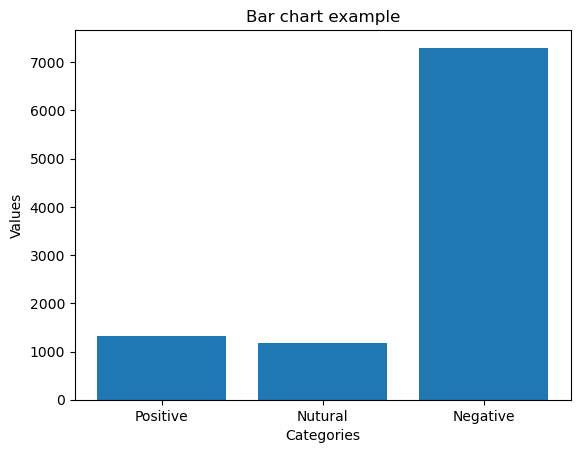

In [36]:
compound_scores = []
for tweet_scores in all_scores:
    compound_scores.append(tweet_scores['compound'])
    
scores = np.array(compound_scores)

x = np.array(['Positive', 'Nutural', 'Negative'])
y = np.array([np.sum(scores > 0), np.sum(scores == 0), np.sum(scores < 0)])

# Create bar chart
plt.bar(x, y)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar chart example')

# Show chart
plt.show()

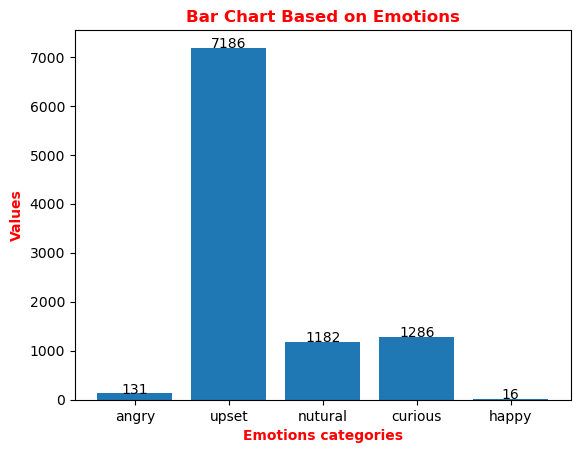

In [46]:
compound_scores = []
for tweet_scores in all_scores:
    compound_scores.append(tweet_scores['compound'])
    
scores = np.array(compound_scores)

x = np.array([emotion for emotion in emotion_dict.keys()])
y = np.array([emotion[1] for emotion in emotion_dict.items()])

# Create bar chart
plt.bar(x, y)

# Write the number of each bar above it
for i, v in enumerate(y):
    plt.text(i, v + 0.2, str(v), ha='center')

# Add labels and title
plt.xlabel('Emotions categories', fontweight="bold", color="red")
plt.ylabel('Values', fontweight="bold", color="red")
plt.title('Bar Chart Based on Emotions', fontweight="bold", color="red")

# Show chart
plt.show()


In [14]:
STOP_WORDS = stopwords.words()

# removing the emojies
# https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


def cleaning(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    text = EMOJI_PATTERN.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

max_rows = 1000

dt = data['text'].apply(cleaning)

word_count = Counter(" ".join(dt).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['tag word', 'Frequency'])
print('tags frequency:')
word_frequency

tags frequency:


tag word  Frequency
0  constance       8479
1     marten       7414
2       baby       7402
3       mark       5635
4     gordon       5219
5     police       4035
6    missing       3424
7      found       3409
8   arrested       2702
9     search       2644

In [103]:
data.sort_values(by='followers', ascending=False)[['username', 'followers']].drop_duplicates(subset='username').head(20)

username  followers
4018           cnnbrk   64195142
4068              CNN   61267702
2797      BBCBreaking   51682355
947          BBCWorld   39609526
5450          BBCNews   15060185
4066             cnni   14473199
7978         HuffPost   11204819
9730         guardian   10895482
8140          CBSNews    8918937
9455          SkyNews    8371899
5090     SkyNewsBreak    4992359
104   SaharaReporters    4954862
9717     guardiannews    3863436
9702      Independent    3628449
9363        Telegraph    3378165
6532       MailOnline    2820638
9373          itvnews    2611789
4827     Channel4News    2473570
8246           TheSun    2065794
8459             VICE    2015297

In [28]:


locations = data.drop_duplicates(subset='username')['location']

processed_locations = []
for location in locations:
    if type(location) == str:
        location = location.split(', ')
        processed_locations.append(location)
        
country_counter = {}

# get all countries
all_countries = list(pycountry.countries)


for country in all_countries:
    country_counter[country.name] = 0

else:
    country_counter['Unknown'] = 0
    

for country in all_countries:
    for item in processed_locations:
        if country.name in item:
            country_counter[country.name] += 1
        elif country.alpha_2 in item:
            country_counter[country.name] += 1
        elif country.alpha_3 in item:
            country_counter[country.name] += 1
        elif country.flag in item:
            country_counter[country.name] += 1
            
sorted_countries = dict(sorted(country_counter.items(), key=lambda x: x[1], reverse=True))



In [34]:
dict_for_drawing_chart = {}

# set the threshold value
threshold = 10

for country in sorted_countries.items():
    if country[1] > threshold:
        dict_for_drawing_chart[country[0]] = country[1]


# sum the values less than the threshold
total = sum(value for value in sorted_countries.values() if value < threshold)

dict_for_drawing_chart['Others'] = total

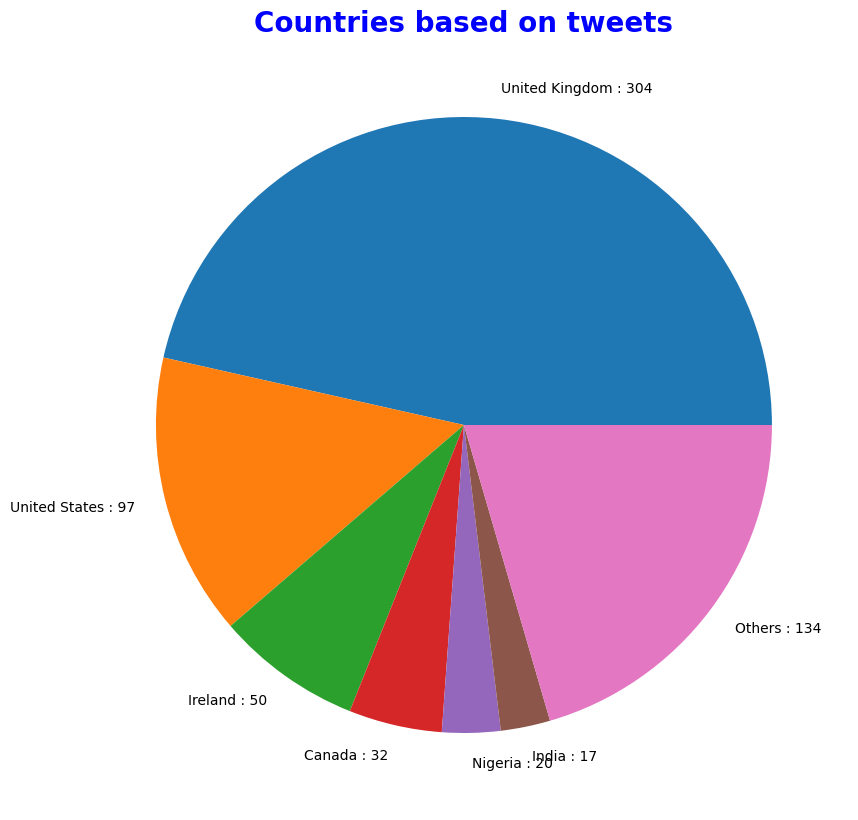

Also 4457 tweets had unknown locations


In [55]:
# data for the pie chart

labels = np.array([str(country[0]+" : "+ str(country[1])) for country in dict_for_drawing_chart.items()])

sizes = np.array([country[1] for country in dict_for_drawing_chart.items()])


# create a figure with a larger size
plt.figure(figsize=(10, 10))

# create a pie chart
plt.pie(sizes, labels=labels)

# add a title to the chart
plt.title('Countries based on tweets', fontweight="bold", color="blue", fontsize=20)

# display the chart
plt.show()

unknowns = len(locations) - sum(value for value in sorted_countries.values())



print(f"Also {unknowns} tweets had unknown locations")

In [22]:
locations = data.drop_duplicates(subset='username')['location']

processed_locations = []
for location in locations:
    if type(location) == str:
        location = location.split(', ')
        processed_locations.append(location)
        
country_counter = {}

# get all countries
all_countries = list(pycountry.countries)


for country in all_countries:
    if country.name == 'United Kingdom':
        GB = country
        
GB_tweets = []
        
for item in processed_locations:
    if GB.name in item:
        GB_tweets.append(item)
    elif GB.alpha_2 in item:
        GB_tweets.append(item)
    elif GB.alpha_3 in item:
        GB_tweets.append(item)
    elif GB.flag in item:
        GB_tweets.append(item)
        


In [29]:
GB_names = [GB.name, GB.alpha_2, GB.alpha_3, GB.flag]
unknown_city = 0
cities ={}
for items in GB_tweets:
    for item in items:
        if item in GB_names:
            items.remove(item)
        if len(items) == 0:
            unknown_city += 1
        else:
            if items[0] in cities.keys():
                cities[items[0]] += 1
            else:
                cities[items[0]] = 1
                


In [33]:
cities = dict(sorted(cities.items(), key=lambda x: x[1], reverse=True))
cities['Unknown'] = unknown_city
cities

{'England': 224,
 'Scotland': 46,
 'Wales': 24,
 'London': 12,
 'Northern Ireland': 4,
 'East Kilbride': 2,
 'Belfast': 2,
 'Surrey': 2,
 'Southsea': 2,
 'Manchester': 2,
 'Northampton': 2,
 'Derbyshire': 2,
 'Salford': 2,
 'Kent,England': 2,
 'West Sussex': 2,
 'Oxford': 2,
 'Africa': 1,
 'Hertfordshire': 1,
 'Unknown': 136}